In [1]:
import pytest
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
a = sys.path.append('../modules/')
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators, aux_operators
import timeit

In [32]:

def create_population_v1(xmax, xmin, ymax, ymin, zlim, z_min, inclmax, inclmin, declmax, declmin, magmax, magmin, n_dip, n_pop, homogeneo):
    """
    Função com o objetivo de criar uma população com n indivíduos randômicos, que estaram de acordo com os parâmetros
    escolhidos.

    :param xmax: O valor máximo da coordenada X.
    :param ymax: O valor máximo da coordenada Y.
    :param zlim: O valor máximo da coordenada Z.
    :param xmin: O valor minímo da coordenada X.
    :param ymin: O valor minímo da coordenada Y.
    :param z_min: O valor minímo da coordenada Z.
    :param n_pop: O número de indivíduos desejados na população.
    :param n_dip: O número de dipolos desejados para cada indivíduo.
    :param inclmax: Valor máximo da inclianção magnética.
    :param inclmin: Valor mínimo da inclianção magnética.
    :param declmax: Valor máximo da inclianção magnética.
    :param declmin: Valor mínimo da declianção magnética.
    :param magmax: Valor máximo da magnetização.
    :param magmin: Valor mínimo da magnetização.
    :param homogeneo: True para valores de inclinação, declinação e magnetização iguais para as n dipolos.
                      False é a opção default, onde os valores de inclinação, declinação e magnetização é criada de
                      forma randômica.

    :return pop: Lista com n indivíduos/dipolos criados de forma randômica.
    """
    if n_pop >= 10:
        pop = []
        n_par = 6
        for j in range(n_pop):
            individuo = np.zeros((n_dip, n_par))
            coodX, coodY, coodZ = sample_random.sample_random_coordinated(xmax, xmin, ymax, ymin, zlim, z_min, n_dip)
            incl, decl, mag = sample_random.sample_random_mag(inclmax, inclmin, declmax, declmin, magmax, magmin, n_dip, homogeneo)
            for i in range(n_dip):
                individuo[i][0], individuo[i][1], individuo[i][2], individuo[i][3], individuo[i][4], individuo[i][5] = coodX[i], coodY[i], coodZ[i], incl[i], decl[i], mag[i]
            pop.append(individuo)
        return pop
    else:
        return print('Por favor. Coloque o número de indivíduos maior ou igual a 10')


In [33]:
population = {'xmax': 10000.0,
                'xmin': -10000.0,
                'ymax': 10000.0,
                'ymin': -10000.0,
                'zlim': 150.0,
                'z_min': 0.0,
                'n_dip': 5,
                'n_pop': 30,
                'inclmax': -80.0,
                'inclmin': 15.0,
                'declmax': 172.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }

In [34]:
%timeit create_population_v1(**population)

2.02 ms ± 79.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
def fit_value_v1(X, Y, Z, I, D, pop, tfa_n_dip):
    """
    Função que calcula o fitness de cada indivíduo da população.

    :param X: Pontos de observação na coordenadas X.
    :param Y: Pontos de observação na coordenadas Y.
    :param Z: Pontos de observação na coordenadas Z.
    :param I: Inclinação magnética regional.
    :param D: Declinação magnética regional.
    :param pop: População com n indivíduos.
    :param tfa_n_dip: Anomalia magnética referência.

    :return fit_cada: Lista com o valor de fitness de cara indivíduo da população.
    """
    raio = 100.0
    fit_cada = []

    for i in range(len(pop)):
        spheres = []
        incl = []
        decl = []
        mag = []
        for j in range(len(pop[0])):
            spheres.append((pop[i][j][0], pop[i][j][1], pop[i][j][2], raio))
            incl.append(pop[i][j][3])
            decl.append(pop[i][j][4])
            mag.append(pop[i][j][5])

        tfa_dip = aux_operators.tfa_n_dips(incl, decl, mag, len(pop[0]), X, Y, Z, I, D, spheres)
        fit_cada.append(aux_operators.f_difference(tfa_n_dip, tfa_dip))
    return fit_cada

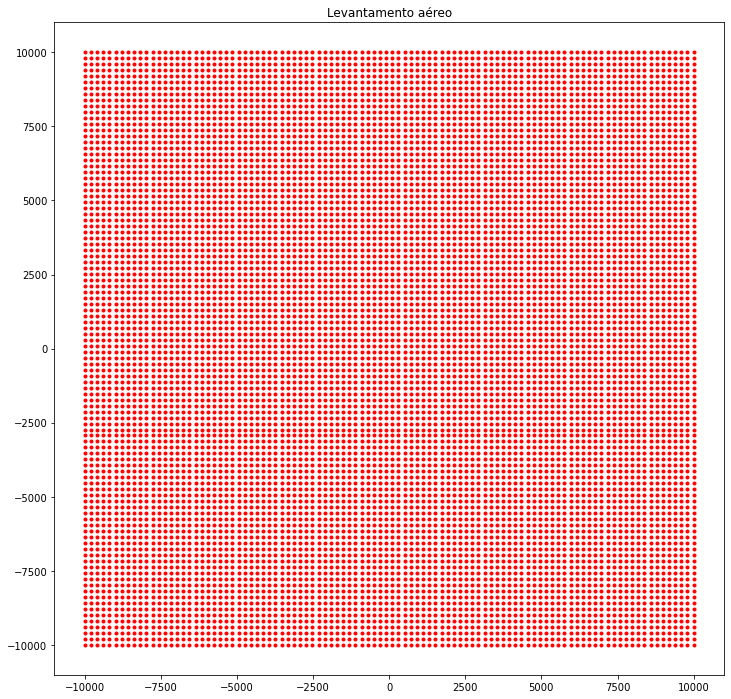

In [35]:
acquisition = {'nx': 100,
                  'ny': 100,
                  'xmin': -10000,
                  'xmax': 10000,
                  'ymin': -10000,
                  'ymax': 10000,
                  'z': -100.0,
                  'color': '.r'}

cood_bounds = {'xmax': 250.0,
                'xmin': 40.0,
                'ymax': 100.0,
                'ymin': 0.0,
                'zlim': 150,
                'z_min': 100,
                'n': 5}

mag_bounds = {'inclmax': -20.0,
                'inclmin': 15.0,
                'declmax': 20.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 1.0,
                'homogeneo': True,
                'n': 5}

coodX, coodY, coodZ = sample_random.sample_random_coordinated(**cood_bounds)

incl, decl, mag = sample_random.sample_random_mag(**mag_bounds)

x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

balls_mag = {'incl': incl,
               'decl': decl,
               'mag': mag,
               'n': 5,
               'Xref': X,
               'Yref': Y,
               'Zref': Z,
               'I': 30.0,
               'D': 50.0,
               'coodX': coodX,
               'coodY': coodY,
               'coodZ': coodZ,
               'raio': 100.0}

tfa_n_bolinhas = sample_random.tfa_n_dots(**balls_mag)

I, D = 30.0, 50.0

pop = Operators.create_population(**population)

In [36]:
def caculation_anomaly(X, Y, Z, I, D, pop):
    raio = 100.0
    anomaly = []

    for i in range(len(pop)):
        spheres = []
        incl = []
        decl = []
        mag = []
        for j in range(len(pop[0])):
            spheres.append((pop[i][j][0], pop[i][j][1], pop[i][j][2], raio))
            incl.append(pop[i][j][3])
            decl.append(pop[i][j][4])
            mag.append(pop[i][j][5])
        anomaly.append(aux_operators.tfa_n_dips(incl, decl, mag, len(pop[0]), X, Y, Z, I, D, spheres))
    return anomaly

In [37]:
anomalia = caculation_anomaly(X, Y, Z, I, D, pop)
print(len(anomalia))

30


In [38]:
def fit_value_v2(X, Y, Z, I, D, pop, tfa_n_dip):
    """
    Função que calcula o fitness de cada indivíduo da população.

    :param X: Pontos de observação na coordenadas X.
    :param Y: Pontos de observação na coordenadas Y.
    :param Z: Pontos de observação na coordenadas Z.
    :param I: Inclinação magnética regional.
    :param D: Declinação magnética regional.
    :param pop: População com n indivíduos.
    :param tfa_n_dip: Anomalia magnética referência.

    :return fit_cada: Lista com o valor de fitness de cara indivíduo da população.
    """
    fit_cada = []
    anomalia = caculation_anomaly(X, Y, Z, I, D, pop)
    for i in range(len(pop)):
        fit_cada.append(aux_operators.f_difference(tfa_n_dip, anomalia[i]))
    return fit_cada

In [39]:
%timeit fit_value_v2(X, Y, Z, I, D, pop, tfa_n_bolinhas)

229 ms ± 27.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
%timeit fit_value_v1(X, Y, Z, I, D, pop, tfa_n_bolinhas)

237 ms ± 20.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
fit_cada1 = fit_value_v1(X, Y, Z, I, D, pop, tfa_n_bolinhas)
fit_cada2 = fit_value_v2(X, Y, Z, I, D, pop, tfa_n_bolinhas)

print(fit_cada1)
print(fit_cada2)

[490.95329294670614, 274.69357122806224, 477.71109238304393, 520.4820471546574, 233.02551199326538, 601.0608052753272, 173.56130474003385, 435.2736329216412, 262.3678384629059, 4675.08897395712, 229.81004123808296, 1091.4969683327854, 664.0755078772928, 864.1126641012293, 174.95141618220086, 1985.420484718056, 3899.9300211187037, 195.04120881665168, 148.62670542239593, 329.81503932260443, 358.78240965062537, 650.6069234161188, 113.19449367292269, 706.4074244951983, 159.62165912551419, 778.8226454590168, 566.1993516022792, 171.54937121548653, 440.7087016238485, 307.7992127546684]
[490.95329294670614, 274.69357122806224, 477.71109238304393, 520.4820471546574, 233.02551199326538, 601.0608052753272, 173.56130474003385, 435.2736329216412, 262.3678384629059, 4675.08897395712, 229.81004123808296, 1091.4969683327854, 664.0755078772928, 864.1126641012293, 174.95141618220086, 1985.420484718056, 3899.9300211187037, 195.04120881665168, 148.62670542239593, 329.81503932260443, 358.78240965062537, 65

In [13]:
def tournament_selection_v1(pop, fit_cada):
    """
    Função com o objetivo de selecionar os futuros pais, pelo dinâmica do Torneio.

    :param pop: População com n indivíduos.
    :param fit_cada: O valor de fitness para cada n indivpiduos.

    :return chosen: Lista com os n pais.
    """

    pop_1 = pop.copy()
    chosen = []
    for i in range(int(0.2 * len(pop))):
        capture_select = []
    # ---------------------------- Escolhidos para o torneio ---------------------------------#
        index_select = list(random.sample(range(0, len(pop_1)), k=(int(0.2 * len(pop)))))
        for j in range(int(0.2 * len(pop))):
            capture = [fit_cada1[index_select[j]], index_select[j]]
            capture_select.append(capture)
    # ---------------------------- Vencedor do torneio ---------------------------------#
        escolhido = pop_1[min(capture_select[:])[1]]
    # ------------------ Retirada do vencedor da população artificial ------------------------#
        del (pop_1[min(capture_select[:])[1]])
    # ---------------------------- Vencedores do torneio ---------------------------------#
        chosen.append(escolhido)

    return chosen

In [14]:
'''pop_1 = pop.copy()
chosen = []
for i in range(int(0.2 * len(pop))):
    capture_select = []
    # ---------------------------- Escolhidos para o torneio ---------------------------------#
    index_select = list(random.sample(range(0, len(pop_1)), k=(int(0.2 * len(pop)))))
    for j in range(int(0.2 * len(pop))):
        capture = [fit_cada1[index_select[j]], index_select[j]]
        capture_select.append(capture)
    # ---------------------------- Vencedor do torneio ---------------------------------#
    escolhido = pop_1[min(capture_select[:])[1]]
    # ------------------ Retirada do vencedor da população artificial ------------------------#
    del (pop_1[min(capture_select[:])[1]])
        # ---------------------------- Vencedores do torneio ---------------------------------#
    chosen.append(escolhido)

#print(capture_select)
#print(min(capture_select[:]))
#print(min(capture_select[:])[1])
'''

'pop_1 = pop.copy()\nchosen = []\nfor i in range(int(0.2 * len(pop))):\n    capture_select = []\n    # ---------------------------- Escolhidos para o torneio ---------------------------------#\n    index_select = list(random.sample(range(0, len(pop_1)), k=(int(0.2 * len(pop)))))\n    for j in range(int(0.2 * len(pop))):\n        capture = [fit_cada1[index_select[j]], index_select[j]]\n        capture_select.append(capture)\n    # ---------------------------- Vencedor do torneio ---------------------------------#\n    escolhido = pop_1[min(capture_select[:])[1]]\n    # ------------------ Retirada do vencedor da população artificial ------------------------#\n    del (pop_1[min(capture_select[:])[1]])\n        # ---------------------------- Vencedores do torneio ---------------------------------#\n    chosen.append(escolhido)\n\n#print(capture_select)\n#print(min(capture_select[:]))\n#print(min(capture_select[:])[1])\n'

In [15]:
%timeit tournament_selection_v1(pop, fit_cada1)

96.8 µs ± 7.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [16]:
pais_torneio = tournament_selection_v1(pop, fit_cada1)

In [17]:
def crossover_v1(pais_torneio):
    filhos = []
    n_filhos = int(len(pais_torneio) / 2)
    pai = np.array(pais_torneio[0:n_filhos])
    mae = np.array(pais_torneio[n_filhos:len(pais_torneio)])
    prob_pai = random.random()
    prob_mae = random.random()
    den = prob_mae + prob_pai

    for j in range(n_filhos):
        num = (prob_pai * pai[j] + prob_mae * mae[j])
        filho = num / den
        filhos.append(filho)

    return filhos


In [18]:
n_filhos = int(len(pais_torneio) / 2)
print(n_filhos)
pai = np.array(pais_torneio[0:n_filhos])
mae = np.array(pais_torneio[n_filhos:len(pais_torneio)])

def definition_prob(pai_torneio, X, Y, Z, I, D, n_filhos, tfa_n_bolinhas):
    prob_pai = []
    prob_mae = []
    sum_den = []

    fit_pais = fit_value_v2(X, Y, Z, I, D, pai_torneio, tfa_n_bolinhas)
    f_pais, f_maes = fit_pais[0:n_filhos], fit_pais[n_filhos:len(pai_torneio)]
    for i in range(n_filhos):
        casal = [f_pais[i], f_maes[i]]
        melhor = casal.index(min(casal))
        if melhor == 0:
            prob_pai.append(random.uniform(0.5, 1.0))
            prob_mae.append(random.random())
        else:
            prob_mae.append(random.uniform(0.5, 1.0))
            prob_pai.append(random.random())
        sum_den.append(prob_pai[i] + prob_mae[i])

    return prob_pai, prob_mae, sum_den


p_prob, m_prob, s_dem = definition_prob(pais_torneio, X, Y, Z, I, D, n_filhos, tfa_n_bolinhas)
print(p_prob, m_prob, s_dem)

3
[0.7266511342974449, 0.8058173952533827, 0.7556261309291006] [0.006038376674433188, 0.42071220038085, 0.2420854163341264] [0.7326895109718781, 1.2265295956342328, 0.997711547263227]


In [19]:
%timeit crossover_v1(pais_torneio)

22.1 µs ± 2.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [20]:
def crossover_eletista(pais_torneio,  X, Y, Z, I, D, tfa_n_bolinhas):
    filhos = []
    n_filhos = int(len(pais_torneio) / 2)
    pai = np.array(pais_torneio[0:n_filhos])
    mae = np.array(pais_torneio[n_filhos:len(pais_torneio)])
    prob_pai, prob_mae, den = definition_prob(pais_torneio, X, Y, Z, I, D, n_filhos, tfa_n_bolinhas)

    for j in range(n_filhos):
        num = (prob_pai[j] * pai[j] + prob_mae[j] * mae[j])
        filho = num / den[j] # Verificar se os n filhos estão dentro dos limites de busca.
        filhos.append(filho)

    return filhos

In [21]:
%timeit crossover_eletista(pais_torneio, X, Y, Z, I, D, tfa_n_bolinhas)

45.9 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
filho = crossover_v1(pais_torneio)

In [23]:
def mutacao_v1(filho, xmax, xmin, ymax, ymin, zlim, z_min, inclmax, inclmin, declmax, declmin, magmax, magmin, n, homogeneo):

    prob_mut = 0.01
    for index, rand_mut in enumerate(filho):
        rand_mut = random.random()
        if prob_mut > rand_mut:
            dip_select = random.randint(0, (len(filho[0]) - 1)) #Seleção qual dipolo será mutado.
            param_select = random.randint(0, (len(filho[0][0]) - 1)) #Selecão qual parâmetro será mutado.
            if param_select <= 2:
                coodX, coodY, coodZ = sample_random.sample_random_coordinated(xmax, xmin, ymax, ymin, zlim, z_min, n)
                if param_select == 0:
                    filho[index][dip_select][param_select] = float(coodX[0])
                elif param_select == 1:
                    filho[index][dip_select][param_select] = float(coodY[0])
                elif param_select == 2:
                    filho[index][dip_select][param_select] = float(coodZ[0])
            else:
                incl, decl, mag = sample_random.sample_random_mag(inclmax, inclmin, declmax, declmin, magmax, magmin, n,
                                                                  homogeneo)
                if homogeneo == True:
                    if param_select == 3:
                        filho[index][:, param_select] = float(incl[0])
                    elif param_select == 4:
                        filho[index][:, param_select] = float(decl[0])
                    elif param_select == 5:
                        filho[index][:, param_select] = float(mag[0])
                else:
                    if param_select == 3:
                        filho[index][dip_select][param_select] = float(incl[0])
                    elif param_select == 4:
                        filho[index][dip_select][param_select] = float(decl[0])
                    elif param_select == 5:
                        filho[index][dip_select][param_select] = float(mag[0])

    return filho


In [24]:
filhos_mut = {'xmax': 10000.0,
                'xmin': -10000.0,
                'ymax': 10000.0,
                'ymin': -10000.0,
                'zlim': 150.0,
                'z_min': 0.0,
                'n': 1,
                'inclmax': -80.0,
                'inclmin': 15.0,
                'declmax': 172.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }

In [25]:
%timeit mutacao_v1(filho, **filhos_mut)

1.72 µs ± 130 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [26]:
filhos = mutacao_v1(filho, **filhos_mut)

In [27]:
def elitismo_v1(pop, filhos, fit_cada):
    n_fica = (len(pop) - len(filhos))
    df = pd.DataFrame(fit_cada)
    x = df.sort_values(0, ascending=True)
    piores = x.index[n_fica:]
    for index, pos in enumerate(piores):
        pop[pos] = filhos[index]

    return pop

In [28]:
%timeit elitismo_v1(pop, filhos, fit_cada1)

1.13 ms ± 36.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [29]:
fit_rodada = [104.10914879334956, 104.10914879334956, 104.10914879334956, 104.10914879334956, 104.10914879334956, 104.10914879334956, 104.10914879334956, 104.10914879334956, 104.10914879334956, 104.10914879334956, 104.10914879334956, 103.92869362823858, 103.92869362823858, 103.92869362823858, 103.92869362823858, 103.92869362823858, 102.47961796963487, 102.23280638671147, 102.23280638671147, 102.23280638671147, 102.23280638671147, 102.23280638671147, 102.23280638671147, 102.23280638671147, 102.23280638671147, 102.23280638671147, 102.23280638671147, 102.23280638671147, 102.23280638671147, 102.23280638671147, 101.83729241892279, 101.83729241892279, 101.83729241892279, 101.83729241892279, 101.83729241892279, 101.83729241892279, 101.83729241892279, 101.83729241892279, 101.11636128641891, 99.0148946126171, 98.38262660480673, 98.38262660480673, 98.29568335933938, 98.29568335933938, 98.29568335933938, 98.29568335933938, 98.29568335933938, 98.29568335933938, 98.29568335933938, 98.29568335933938, 98.29568335933938, 98.29568335933938, 98.29568335933938, 98.20190444071582, 98.20190444071582, 98.20190444071582, 98.20190444071582, 98.20190444071582, 98.20190444071582, 98.20190444071582, 98.20190444071582, 98.20190444071582, 98.20190444071582, 98.20190444071582, 98.20190444071582, 98.20190444071582, 98.20190444071582, 98.20190444071582, 98.20190444071582, 98.20190444071582, 98.18782346051232, 98.18782346051232, 98.18782346051232, 98.18782346051232, 98.18782346051232, 98.18782346051232, 98.18782346051232, 97.91238780756827, 97.91238780756827, 97.91238780756827, 97.91238780756827, 97.91238780756827, 97.91238780756827, 97.91238780756827, 97.91238780756827, 97.910047043656, 97.76401580099613, 97.10175608484276, 97.10175608484276, 97.10175608484276, 97.10175608484276, 97.10175608484276, 97.10175608484276, 97.10175608484276, 97.10175608484276, 97.10175608484276, 97.10175608484276, 97.10175608484276, 97.10175608484276, 96.99258583597327, 96.99258583597327, 96.99258583597327, 96.99258583597327, 96.99258583597327, 96.99258583597327, 96.99258583597327, 96.99258583597327, 96.99258583597327, 96.99258583597327, 96.99258583597327, 96.99258583597327, 96.99258583597327, 96.99258583597327, 96.99258583597327, 96.99258583597327, 96.95648637368116, 96.95648637368116, 96.95648637368116, 96.84177692343167, 96.84177692343167, 96.84177692343167, 96.84177692343167, 96.82559088644486, 96.82559088644486, 96.82559088644486, 96.82559088644486, 96.82559088644486, 96.82559088644486, 96.82559088644486, 96.82559088644486, 96.82559088644486, 96.82559088644486, 96.82559088644486, 96.82559088644486, 96.82559088644486, 96.82559088644486, 96.82559088644486, 96.82559088644486, 96.82559088644486, 96.82559088644486, 96.82559088644486, 96.82558074617401, 96.82558074617401, 96.82558074617401, 96.82558074617401, 96.82558074617401, 96.82558074617401, 96.82558074617401, 96.82558074617401, 96.82558074617401, 96.82558074617401, 96.82501525409803, 96.82501525409803, 96.82501525409803, 96.82501525409803, 96.82501525409803, 96.82501525409803, 96.82501525409803, 96.82501525409803, 96.82501525409803, 96.82501525409803, 96.82501525409803, 96.82501525409803, 96.82499406518838, 96.82499406518838, 96.82499406518838, 96.82499406518838, 96.8249894366704, 96.8249894366704, 96.82497744167748, 96.82497744167748, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.82494836106608, 96.55945841531612, 96.52284722601026, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50635624990966, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50185340460519, 96.50057360164179, 96.50057360164179, 96.50057360164179, 96.50057360164179, 96.50057360164179, 96.50057360164179, 96.50057360164179, 96.50057360164179, 96.50057360164179, 96.50057360164179, 96.50057360164179, 96.50057360164179, 96.50057360164179, 96.50056812037263, 96.50056812037263, 96.50056731323888, 96.50056731323888, 96.50056731323888, 96.50056731323888, 96.50056731323888, 96.50056731323888, 96.50056731323888, 96.47308233028389, 96.4086845749231, 96.4086845749231, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.36120068578128, 96.3572791905006, 96.3572791905006, 96.3572791905006, 96.3572791905006, 96.3572791905006, 96.3572791905006, 96.3572791905006, 96.3572791905006, 96.3572791905006, 96.3572791905006, 96.3572791905006, 96.3572791905006, 96.3572791905006, 96.3572791905006, 96.3572791905006, 96.3572791905006, 96.35723870645805, 96.35723870645805, 96.35723870645805, 96.35723870645805, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.35721247572941, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 96.3571981103971, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.88024053341445, 95.63390887243727, 95.63390887243727, 95.63390887243727, 95.63390887243727, 95.63390887243727, 95.63390887243727, 95.63390887243727, 95.63390887243727, 95.63390887243727, 95.60023391028744, 95.60023391028744, 95.60023391028744, 95.60023391028744]

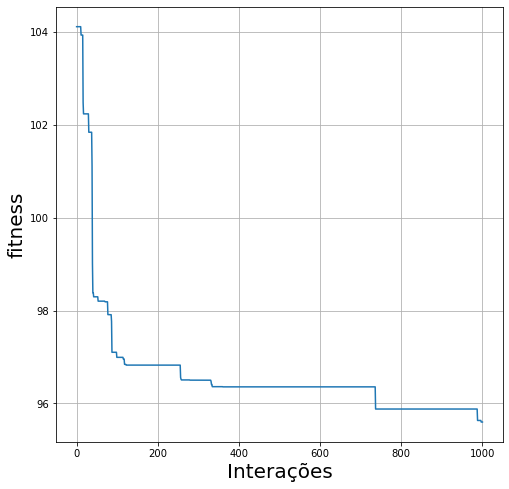

In [30]:
x = np.linspace(0, 1000, 1000)
fig = plt.figure(figsize=(8, 8))
plt.plot(x, fit_rodada)
plt.xlabel('Interações', fontsize=20)
plt.ylabel('fitness', fontsize=20)
plt.grid()
plt.show()

In [31]:
x = []

for i in range(10):
    xcood = np.random.uniform(-5000.0, 5000.0, 10)
    x.append(xcood)


print(x)


[array([ 1597.12933653, -2773.03954622,  3938.84851911,  1458.6483327 ,
        1535.76698422,  -331.11639597,  3345.73717325,  1411.83939316,
        2427.44127806,  1932.99739188]), array([ 4229.60481032, -3643.52770412, -1954.5999169 ,  4186.00675503,
        4487.86663656,  4198.02977241, -2555.0040089 ,  -905.55181089,
        2774.22910438, -1926.8089354 ]), array([ 1756.94766941,  2511.17744082,  4946.57486007, -4475.50868155,
        1989.45111507, -3232.93750913,  4698.05761328, -3983.40024324,
        -301.17456228, -3794.16206354]), array([  275.52865304, -4189.71811142, -2988.5626476 ,  1604.75614196,
        1178.59734314, -2860.96502312,   117.28776461, -3818.48685954,
         522.05370072,  -432.75341985]), array([ -227.14711683,  -692.92600437,  1434.36046571,  1801.0666443 ,
       -4030.68996321,  3620.2489863 , -1597.34364023,  4714.49842204,
       -2304.01957407, -1130.22293317]), array([-4972.58820944,  3801.56547942, -1657.02596799, -3025.19886361,
        1900.